# Undersampling Algorithms for Imbalanced Classification

Resampling methods are designed to change the composition of a training dataset for an imbalanced classification task.
Most of the attention of resampling methods for imbalanced classification is put on oversampling the minority class. Nevertheless, a suite of techniques has been developed for undersampling the majority class that can be used in conjunction with effective oversampling methods.

- Undersampling refers to a group of techniques designed to balance the class distribution for a classification dataset that has a skewed class distribution. 
- An imbalanced class distribution will have one or more classes with few examples (the minority classes) and one or more classes with many examples (the majority classes).
- Undersampling techniques remove examples from the training dataset that belong to the majority class in order to better balance the class distribution, such as reducing the skew from a 1:100 to a 1:10, 1:2, or even a 1:1 class distribution. This is different from oversampling that involves adding examples to the minority class in an effort to reduce the skew in the class distribution.
- Undersampling methods can be used directly on a training dataset that can then, in turn, be used to fit a machine learning model. 
- Typically, undersampling methods are used in conjunction with an oversampling technique for the minority class, and this combination often results in better performance than using oversampling or undersampling alone on the training dataset.

There are many undersampling techniques. In the following sections, we will review some of the more common methods.

## Creating an Imbalance Dataset

We can define a synthetic binary classification dataset using the `make_classification()` function from the `scikit-learn` library. For example, we can create 10,000 examples with two input variables and a 1:100 distribution as follows.

### imports

In [1]:
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where

### define dataset

In [2]:
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
                                    n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

### summarize class distribution

In [3]:
counter = Counter(y)
print(counter)

Counter({0: 9900, 1: 100})


### scatter plot of examples by class label

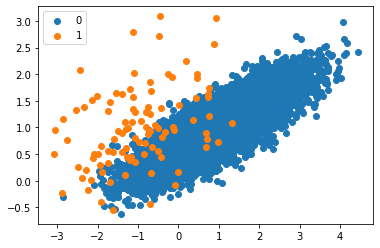

In [4]:
import matplotlib.pyplot as plt

for label, _ in counter.items():
    row_ix = where(y == label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plt.show()

## Random Undersampling

Although simple and effective, a limitation of this technique is that examples are removed without any concern for how useful or important they might be in determining the decision boundary between the classes. This means it is possible, or even likely, that useful information will be deleted.

> *The major drawback of random undersampling is that this method can discard potentially useful data that could be important for the induction process. The removal of data is a critical decision to be made, hence many the proposal of undersampling use heuristics in order to overcome the limitations of the non- heuristics decisions.*

## 1. Methods that Select Examples to Keep

In this section, we will take a closer look at two methods that choose which examples from the majority class to keep, the **near-miss** family of methods, and the popular **condensed nearest neighbor rule**.

### 1.1 Near Miss Undersampling

Near Miss refers to a collection of undersampling methods that select examples based on the distance of majority class examples to minority class examples.

There are three versions of the technique, named NearMiss-1, NearMiss-2, and NearMiss-3.

**NearMiss-1** selects examples from the majority class that have the smallest average distance to the three closest examples from the minority class. **NearMiss-2** selects examples from the majority class that have the smallest average distance to the three furthest examples from the minority class. **NearMiss-3** involves selecting a given number of majority class examples for each example in the minority class that are closest.

Here, distance is determined in feature space using Euclidean distance or similar.

- NearMiss-1: Majority class examples with minimum average distance to three closest minority class examples.
- NearMiss-2: Majority class examples with minimum average distance to three furthest minority class examples.
- NearMiss-3: Majority class examples with minimum distance to each minority class example.

The NearMiss-3 seems desirable, given that it will only keep those majority class examples that are on the decision boundary.

We can implement the Near Miss methods using the `NearMiss` imbalanced-learn class.

The type of near-miss strategy used is defined by the “version” argument, which by default is set to 1 for NearMiss-1, but can be set to 2 or 3 for the other two methods.

### NearMiss-1

In [18]:
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
    n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(y)
print(counter)

Counter({0: 9900, 1: 100})


#### define the undersampling method

In [19]:
from imblearn.under_sampling import NearMiss

undersample = NearMiss(version=1, n_neighbors=3)

#### transform the dataset

In [20]:
X, y = undersample.fit_resample(X, y)

#### summarize the new class distribution

In [21]:
counter = Counter(y)
print(counter)

Counter({0: 100, 1: 100})


#### scatter plot of examples by class label

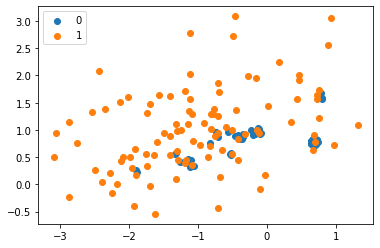

In [23]:
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

We can see that, as expected, only those examples in the majority class that are closest to the minority class examples in the overlapping area were retained.

### NearMiss-2

Next, we can demonstrate the NearMiss-2 strategy, which is an inverse to NearMiss-1. It selects examples that are closest to the most distant examples from the minority class, defined by the n_neighbors argument.

In [24]:
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
    n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(y)
print(counter)

Counter({0: 9900, 1: 100})


#### define the undersampling method

In [25]:
undersample = NearMiss(version=2, n_neighbors=3)

#### transform the dataset

In [26]:
X, y = undersample.fit_resample(X, y)

#### summarize the new class distribution

In [27]:
counter = Counter(y)
print(counter)

Counter({0: 100, 1: 100})


#### scatter plot of examples by class label

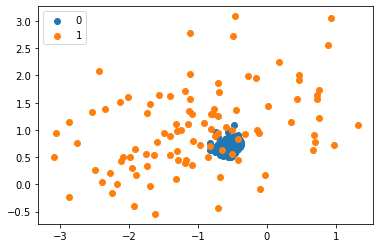

In [28]:
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

Running the example, we can see that the NearMiss-2 selects examples that appear to be in the center of mass for the overlap between the two classes.

### NearMiss-3

Finally, we can try NearMiss-3 that selects the closest examples from the majority class for each minority class.

The n_neighbors_ver3 argument determines the number of examples to select for each minority example, although the desired balancing ratio set via sampling_strategy will filter this so that the desired balance is achieved.

In [29]:
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
    n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(y)
print(counter)

Counter({0: 9900, 1: 100})


#### define the undersampling method

In [30]:
undersample = NearMiss(version=3, n_neighbors_ver3=3)

#### transform the dataset

In [31]:
X, y = undersample.fit_resample(X, y)

#### summarize the new class distribution

In [32]:
counter = Counter(y)
print(counter)

Counter({0: 100, 1: 100})


#### scatter plot of examples by class label

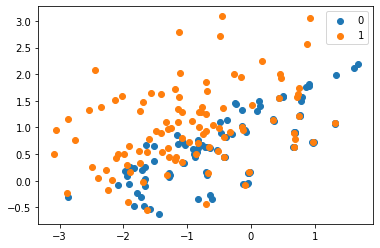

In [33]:
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

### 1.2 Condensed Nearest Neighbor Rule Undersampling

Condensed Nearest Neighbors, or CNN for short, is an undersampling technique that seeks a subset of a collection of samples that results in no loss in model performance, referred to as a minimal consistent set.

> *… the notion of a consistent subset of a sample set. This is a subset which, when used as a stored reference set for the NN rule, correctly classifies all of the remaining points in the sample set.*

It is achieved by enumerating the examples in the dataset and adding them to the “store” only if they cannot be classified correctly by the current contents of the store. 

When used for imbalanced classification, the store is comprised of all examples in the minority set and only examples from the majority set that cannot be classified correctly are added incrementally to the store.

In [34]:
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
    n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(y)
print(counter)

Counter({0: 9900, 1: 100})


#### define the undersampling method

In [36]:
from imblearn.under_sampling import CondensedNearestNeighbour

undersample = CondensedNearestNeighbour(n_neighbors=1)

#### transform the dataset

In [37]:
X, y = undersample.fit_resample(X, y)

#### summarize the new class distribution

In [38]:
counter = Counter(y)
print(counter)

Counter({0: 189, 1: 100})


#### scatter plot of examples by class label

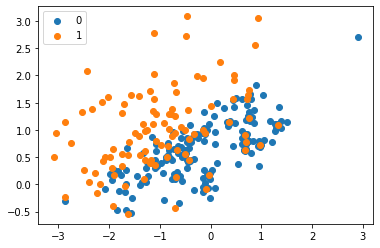

In [39]:
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

Running the example first reports the skewed distribution of the raw dataset, then the more balanced distribution for the transformed dataset.

We can see that the resulting distribution is about 1:2 minority to majority examples. This highlights that although the sampling_strategy argument seeks to balance the class distribution, the algorithm will continue to add misclassified examples to the store (transformed dataset). This is a desirable property.

## 2. Methods that Select Examples to Delete

In this section, we will take a closer look at methods that select examples from the majority class to delete, including the popular Tomek Links method and the Edited Nearest Neighbors rule.

### 2.1 Tomek Links for Undersampling

A criticism of the Condensed Nearest Neighbor Rule is that examples are selected randomly, especially initially.

This has the effect of allowing redundant examples into the store and in allowing examples that are internal to the mass of the distribution, rather than on the class boundary, into the store.

> The condensed nearest-neighbor (CNN) method chooses samples randomly. This results in a)retention of unnecessary samples and b) occasional retention of internal rather than boundary samples.

One of the modifications (Method2) is a rule that finds pairs of examples, one from each class; they together have the smallest Euclidean distance to each other in feature space.

This means that in a binary classification problem with classes 0 and 1, a pair would have an example from each class and would be closest neighbors across the dataset.

> In words, instances a and b define a Tomek Link if: (i) instance a’s nearest neighbor is b, (ii) instance b’s nearest neighbor is a, and (iii) instances a and b belong to different classes.

These cross-class pairs are now generally referred to as “Tomek Links” and are valuable as they define the class boundary.

> Method 2 has another potentially important property: It finds pairs of boundary points which participate in the formation of the (piecewise-linear) boundary. […] Such methods could use these pairs to generate progressively simpler descriptions of acceptably accurate approximations of the original completely specified boundaries.

The procedure for finding Tomek Links can be used to locate all cross-class nearest neighbors. If the examples in the minority class are held constant, the procedure can be used to find all of those examples in the majority class that are closest to the minority class, then removed. These would be the ambiguous examples.

> From this definition, we see that instances that are in Tomek Links are either boundary instances or noisy instances. This is due to the fact that only boundary instances and noisy instances will have nearest neighbors, which are from the opposite class.

In [40]:
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
    n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(y)
print(counter)

Counter({0: 9900, 1: 100})


#### define the undersampling method

In [41]:
from imblearn.under_sampling import TomekLinks

undersample = TomekLinks()

#### transform the dataset

In [42]:
X, y = undersample.fit_resample(X, y)

#### summarize the new class distribution

In [43]:
counter = Counter(y)
print(counter)

Counter({0: 9874, 1: 100})


#### scatter plot of examples by class label

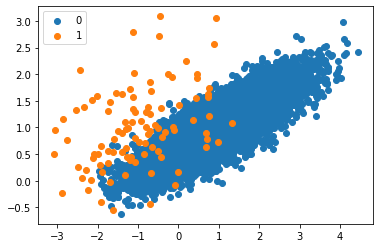

In [44]:
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

We can see that only 26 examples from the majority class were removed.

This highlights that although finding the ambiguous examples on the class boundary is useful, alone, it is not a great undersampling technique. In practice, the Tomek Links procedure is often combined with other methods, such as the Condensed Nearest Neighbor Rule.

> The choice to combine Tomek Links and CNN is natural, as Tomek Links can be said to remove borderline and noisy instances, while CNN removes redundant instances.

### 2.2 Edited Nearest Neighbors Rule for Undersampling

Another rule for finding ambiguous and noisy examples in a dataset is called Edited Nearest Neighbors, or sometimes ENN for short.

This rule involves using k=3 nearest neighbors to locate those examples in a dataset that are misclassified and that are then removed before a k=1 classification rule is applied.

> The modified three-nearest neighbor rule which uses the three-nearest neighbor rule to edit the preclassified samples and then uses a single-nearest neighbor rule to make decisions is a particularly attractive rule.

When used as an undersampling procedure, the rule can be applied to each example in the majority class, allowing those examples that are misclassified as belonging to the minority class to be removed, and those correctly classified to remain.

It is also applied to each example in the minority class where those examples that are misclassified have their nearest neighbors from the majority class deleted.

> … for each instance a in the dataset, its three nearest neighbors are computed. If a is a majority class instance and is misclassified by its three nearest neighbors, then a is removed from the dataset. Alternatively, if a is a minority class instance and is misclassified by its three nearest neighbors, then the majority class instances among a’s neighbors are removed.

The n_neighbors argument controls the number of neighbors to use in the editing rule, which defaults to three.

In [46]:
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
    n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(y)
print(counter)

Counter({0: 9900, 1: 100})


#### define the undersampling method

In [47]:
from imblearn.under_sampling import EditedNearestNeighbours

undersample = EditedNearestNeighbours(n_neighbors=3)

#### transform the dataset

In [49]:
X, y = undersample.fit_resample(X, y)

#### summarize the new class distribution

In [50]:
counter = Counter(y)
print(counter)

Counter({0: 9806, 1: 100})


#### scatter plot of examples by class label

<function matplotlib.pyplot.show(close=None, block=None)>

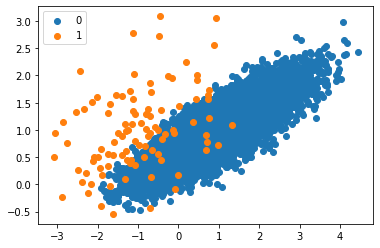

In [51]:
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show

We can see that only 94 examples from the majority class were removed.

Given the small amount of undersampling performed, the change to the mass of majority examples is not obvious from the plot.

Also, like Tomek Links, the Edited Nearest Neighbor Rule gives best results when combined with another undersampling method.

## 3. Combinations of Keep and Delete Methods

In this section, we will take a closer look at techniques that combine the techniques we have already looked at to both keep and delete examples from the majority class, such as One-Sided Selection and the Neighborhood Cleaning Rule.

### 3.1 One-Sided Selection for Undersampling

One-Sided Selection, or OSS for short, is an undersampling technique that combines Tomek Links and the Condensed Nearest Neighbor (CNN) Rule.

Specifically, Tomek Links are ambiguous points on the class boundary and are identified and removed in the majority class. The CNN method is then used to remove redundant examples from the majority class that are far from the decision boundary.

> OSS is an undersampling method resulting from the application of Tomek links followed by the application of US-CNN. Tomek links are used as an undersampling method and removes noisy and borderline majority class examples. […] US-CNN aims to remove examples from the majority class that are distant from the decision border.

The CNN procedure occurs in one-step and involves first adding all minority class examples to the store and some number of majority class examples (e.g. 1), then classifying all remaining majority class examples with KNN (k=1) and adding those that are misclassified to the store.

We can implement the OSS undersampling strategy via the `OneSidedSelection` imbalanced-learn class.

The number of seed examples can be set with n_seeds_S and defaults to 1 and the k for KNN can be set via the n_neighbors argument and defaults to 1.

Given that the CNN procedure occurs in one block, it is more useful to have a larger seed sample of the majority class in order to effectively remove redundant examples. In this case, we will use a value of 200.

In [52]:
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
    n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(y)
print(counter)

Counter({0: 9900, 1: 100})


#### define the undersampling method

In [53]:
from imblearn.under_sampling import OneSidedSelection

undersample = OneSidedSelection(n_neighbors=1, n_seeds_S=200)

#### transform the dataset

In [54]:
X, y = undersample.fit_resample(X, y)

#### summarize the new class distribution

In [55]:
counter = Counter(y)
print(counter)

Counter({0: 1137, 1: 100})


#### scatter plot of examples by class label

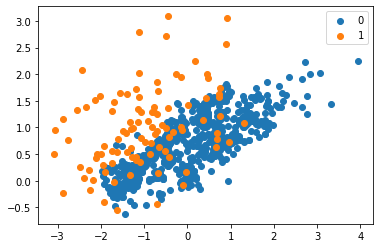

In [56]:
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

We can see that a large number of examples from the majority class were removed, consisting of both redundant examples (removed via CNN) and ambiguous examples (removed via Tomek Links). The ratio for this dataset is now around 1:10., down from 1:100.

Most of the majority class examples left belong are around the class boundary and the overlapping examples from the minority class.

It might be interesting to explore larger seed samples from the majority class and different values of k used in the one-step CNN procedure.

### 3.2 Neighborhood Cleaning Rule for Undersampling

The Neighborhood Cleaning Rule, or NCR for short, is an undersampling technique that combines both the Condensed Nearest Neighbor (CNN) Rule to remove redundant examples and the Edited Nearest Neighbors (ENN) Rule to remove noisy or ambiguous examples.

Like One-Sided Selection (OSS), the CSS method is applied in a one-step manner, then the examples that are misclassified according to a KNN classifier are removed, as per the ENN rule. Unlike OSS, less of the redundant examples are removed and more attention is placed on “cleaning” those examples that are retained.

The reason for this is to focus less on improving the balance of the class distribution and more on the quality (unambiguity) of the examples that are retained in the majority class.

> … the quality of classification results does not necessarily depend on the size of the class. Therefore, we should consider, besides the class distribution, other characteristics of data, such as noise, that may hamper classification.

The approach involves first selecting all examples from the minority class. Then all of the ambiguous examples in the majority class are identified using the ENN rule and removed. Finally, a one-step version of CNN is used where those remaining examples in the majority class that are misclassified against the store are removed, but only if the number of examples in the majority class is larger than half the size of the minority class.

This technique can be implemented using the `NeighbourhoodCleaningRule` imbalanced-learn class. The number of neighbors used in the ENN and CNN steps can be specified via the n_neighbors argument that defaults to three. The threshold_cleaning controls whether or not the CNN is applied to a given class, which might be useful if there are multiple minority classes with similar sizes. This is kept at 0.5.

In [57]:
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
    n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(y)
print(counter)

Counter({0: 9900, 1: 100})


#### define the undersampling method

In [58]:
from imblearn.under_sampling import NeighbourhoodCleaningRule

undersample = NeighbourhoodCleaningRule(n_neighbors=3, threshold_cleaning=0.5)

#### transform the dataset

In [59]:
X, y = undersample.fit_resample(X, y)

#### summarize the new class distribution

In [60]:
counter = Counter(y)
print(counter)

Counter({0: 9786, 1: 100})


#### scatter plot of examples by class label

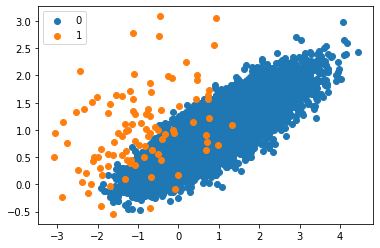

In [61]:
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

We can see that only 114 examples from the majority class were removed.

Given the limited and focused amount of undersampling performed, the change to the mass of majority examples is not obvious from the scatter plot that is created.